# Neuroimaging

*Note: You can download this individual file as a Jupyter Notebook (.ipynb) file by clicking the download button at the top.*

## Exercise 1: Functional connectivity with nilearn

1. Get fMRI and confounds data for one participant from the ADHD dataset
2. Parcellate the fMRI image with the Schäfer 100 atlas and clean in with the corresponding confounds file
3. Estimate functional connectivity with Pearson correlation (try the nilearn `ConnectivityMeasure` class)
4. Plot the connectivity matrix

[get_dataset_dir] Dataset found in /home/mibur/nilearn_data/adhd
[get_dataset_dir] Dataset found in /home/mibur/nilearn_data/schaefer_2018


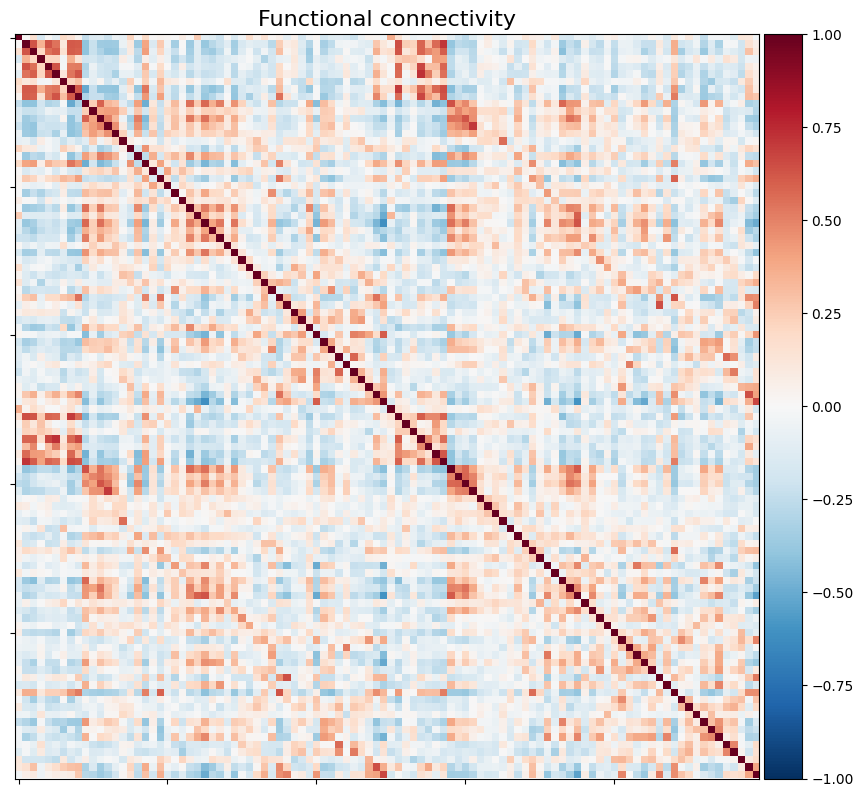

In [12]:
from nilearn import datasets, plotting
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

# 1. Load data
adhd = datasets.fetch_adhd(n_subjects=1)
func = adhd.func[0]
confounds = adhd.confounds[0]

# 2. Parcellate and clean
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100)
masker = NiftiLabelsMasker(labels_img=atlas.maps,
                           standardize=True,
                           detrend=True)
time_series = masker.fit_transform(func, confounds=confounds)

# 3. Estimate functional connectivity
conn_measure = ConnectivityMeasure(kind='correlation')
conn_matrix  = conn_measure.fit_transform([time_series])[0]

# 4. Plot the connectivity matrix
plotting.plot_matrix(conn_matrix,
                     figure=(8, 8),
                     vmax=1, vmin=-1,
                     title='Functional connectivity');

## Exercise 2: Somatosensory ERP

ERP plotting

Reading /home/mibur/Downloads/PuG Workshop/pug2025-workshop/book/1_python/exercises/../../3_practical/data/eeg/21013_E4/21013_E4_postICA_interpolated_fixed.fdt
Reading 0 ... 1349759  =      0.000 ...  2699.518 secs...


/home/mibur/miniconda3/envs/mne/lib/python3.11/site-packages/pymatreader/utils.py:291: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Used Annotations descriptions: ['S 18', 'S 19', 'S 28', 'S 29', 'S 38', 'S 39', 'S 48', 'S 49', 'S 56', 'S 58', 'S 68', 'S 69', 'S 78', 'S 79']
Not setting metadata
104 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 104 events and 501 original time points ...
    Rejecting  epoch based on EEG : ['FC2']
1 bad epochs dropped


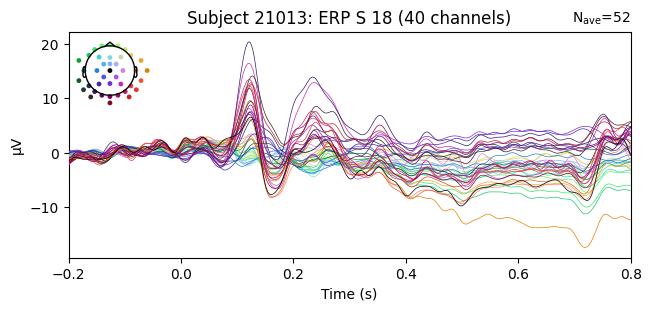

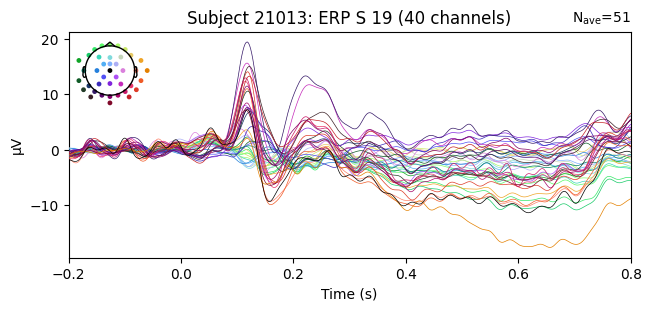

In [ ]:
import mne

# 1. Load subject 21013’s post-ICA EEG
subject = "21013"
fname = f"../../3_practical/data/eeg/{21013}_E4/{subject}_E4_postICA_interpolated_fixed.set"
raw = mne.io.read_raw_eeglab(fname, preload=True)

# 2. Define events of interest
event_map = {f"S {i:2d}": i for i in [18, 19, 28, 29, 38, 39, 48, 49, 56, 58, 68, 69, 78, 79]}
events, event_id = mne.events_from_annotations(raw, event_id=event_map)

# 3. Epoch just “S 18” and “S 19”
conds = {'S 18': event_id['S 18'], 'S 19': event_id['S 19']}
epochs = mne.Epochs(raw, events, event_id=conds,
                    tmin=-0.2, tmax=0.8,
                    baseline=(-0.2, 0),
                    reject=dict(eeg=150e-6),
                    preload=True)

# 4. Compute evoked responses
evokeds = {cond: epochs[cond].average() for cond in conds}

# 5. Plot each ERP (butterfly + spatial coloring)
for cond, ev in evokeds.items():
    ev.plot(spatial_colors=True, time_unit='s', titles=f"Subject {subject}: ERP {cond}")
